In [1]:
import pandas as pd

In [2]:
image_dir = "./clothes_data"

In [3]:
import pickle

# Load the model using pickle
with open("./models/random_forest_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

# Or with joblib
from joblib import load

loaded_model = load("./models/random_forest_model.joblib")

In [4]:
# change to output of classifiers
csv_file = "./processed.csv"
df = pd.read_csv(csv_file)
df = df.loc[:, ~df.columns.str.contains("^Unnamed")]
# df = df.drop("照片 Picture", axis=1)  # Features
df = pd.get_dummies(df, columns=["品牌 Brand"])
df = pd.get_dummies(df, columns=["衣服長度 Clothes Length"])
df = df.sample(n=10)
print(df)

           照片 Picture  價格 Price  上半身 Top  裙子 skirt  \
1694  image_01694.jpg      2490      1.0       0.0   
1162  image_01162.jpg       490      1.0       0.0   
1066  image_01066.jpg       899      0.0       0.0   
1110  image_01110.jpg       890      0.0       0.0   
1518  image_01518.jpg       990      1.0       0.0   
1504  image_01504.jpg      1090      1.0       0.0   
479   image_00479.jpg       499      1.0       0.0   
124   image_00124.jpg       399      1.0       0.0   
1     image_00001.jpg       999      1.0       0.0   
1202  image_01202.jpg      4680      1.0       0.0   

      運動褲/裙 sweat pants / sports skirt  毛衣、針/織衣 Sweater  \
1694                               0.0              0.0   
1162                               0.0              0.0   
1066                               0.0              0.0   
1110                               0.0              0.0   
1518                               0.0              0.0   
1504                               0.0             

Prediction: 452.7487939389592 Actual: 499
image 1188 is downloading
Prediction: 2119.224296841877 Actual: 599
image 1315 is downloading
Prediction: 5878.357561762282 Actual: 5680
image 1310 is downloading
Prediction: 2214.226891282046 Actual: 1980


c:\Users\doo12\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\doo12\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\doo12\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\doo12\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\doo12\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid fea

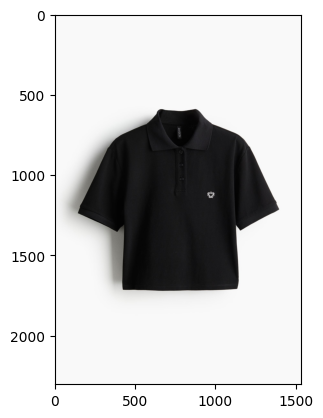

c:\Users\doo12\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Prediction: 612.75 Actual: 499


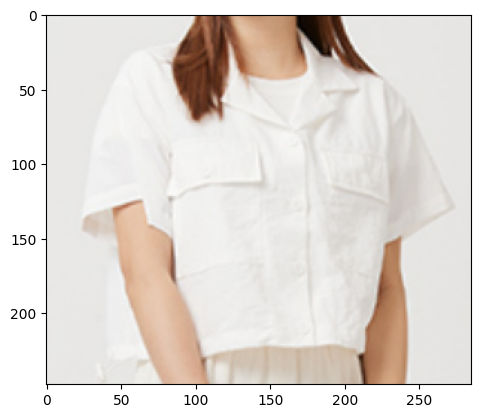

Prediction: 352.01685974478534 Actual: 299
image 808 is downloading
Prediction: 889.6108333333336 Actual: 690
image 721 is downloading
Prediction: 549.904055075901 Actual: 599


c:\Users\doo12\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


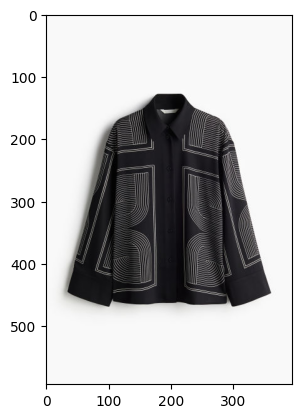

Prediction: 531.6838849180891 Actual: 490
image 1015 is downloading
Prediction: 1776.5838910272735 Actual: 1499
image 1006 is downloading
Prediction: 1577.7555291652793 Actual: 648


c:\Users\doo12\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\doo12\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [35]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import os

for index, row in df.iterrows():
    try:
        # Load and display the image
        image_path = os.path.join(image_dir, row["照片 Picture"])
        image = img.imread(image_path)
        plt.imshow(image)
        plt.show()

    except Exception as e:
        print("image", index, "is downloading")
    # Prepare the row for prediction (drop target column and reshape)
    features = row.drop(["照片 Picture", "價格 Price"]).values.reshape(1, -1)

    # Make a prediction
    pred = loaded_model.predict(features)

    # Get the actual answer for this row
    ans = row["價格 Price"]

    print("Prediction:", pred[0], "Actual:", ans)